## **Introduction to Image Processing**

## Interpolation and Blending

 Importing necessary libraries/modules and functions

In [1]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### ** Resizing an image size using different interpolation functions**

**1. ** Resize the lena or vibot image using nearest, bilinear and bicubic function.

You can define your function which accept the model and resize size from the user or just run a script.

In [2]:
def resize (img, method = 'nearest', size = 0.5):
    #print 'The resize method is {}' format(method)
    #print format(method)
    im_resize = misc.imresize(img, size, interp = method)
    return im_resize




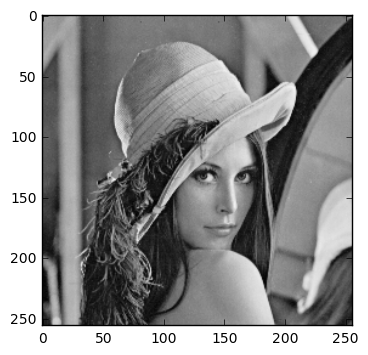

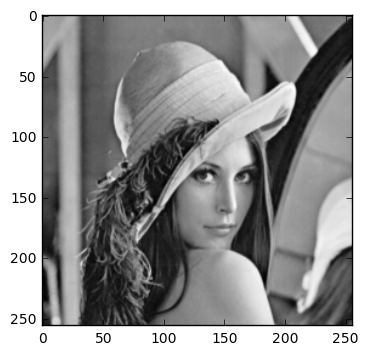

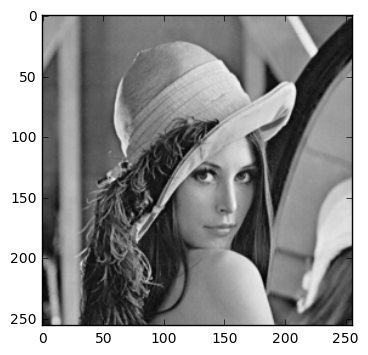

In [3]:
path = './images/'
image_name = 'lena-grey.bmp'
lena_img = io.imread(path.__add__(image_name))
lena_img = img_as_float(lena_img)
methods = ['nearest','bilinear','bicubic']

for m in methods:
    im_resize = resize (lena_img, m, 0.5)
    plt.figure
    plt.imshow(im_resize, cmap=plt.cm.gray)
    plt.show() 
 

**2. ** Similar to the function of `my_blending.m` that you saw before define your function of blending.

Blend the lena image and vibot image using simple, alpha and pyramid method.   

Pyramid blending method: 
1. Create a mask the same size as your input images 
2. Create Laplacian pyramid of the input images 
    2.1. Create Gaussian pyramids of the input images
    2.2. Create Laplacian pyramids using the Gaussian pyramids
3. Create Gaussian pyramid for the region mask
4. Blend the two laplacian pyramids using the pyramid of the mask as weigh 
    $$ BL = L_1 * (GM) + L_2 *(1 - GM)$$
5. Colapse the pyramid to get the final image 
    $$rescale(rescale(rescale(BL_3)+BL_2)+BL_1)+BL_0$$

Note : For pyramid blending approach, you can use:
    * transform.rescale for upscaling your images
    * transform.pyramid_gaussian for building your pyramids
    * The output of transform.pyramid_gaussian is a type generator and you need to convert it to a list :
    
        b = [a for a in Gaussian_pyramid]


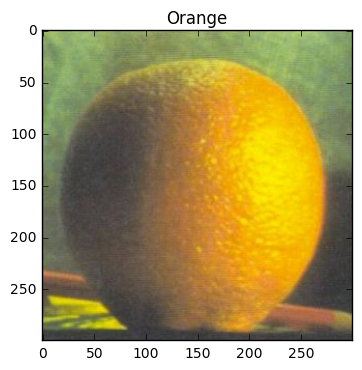

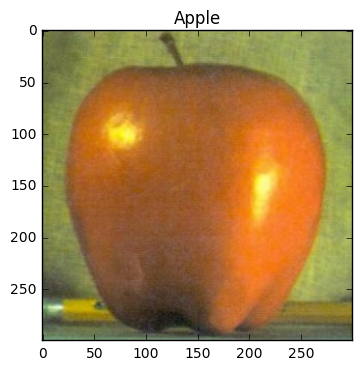

TypeError: data type not understood

In [4]:
from skimage.transform import pyramid_gaussian

def simpleBlend(img1, img2):
    img3 = np.zeros(img1.shape[0], img1.shape[1], 3)
    img3[:,0:np.ceil(img3.shape[1]/2),:] = img1[:,0:np.ceil(img1.shape[1]/2),:]
    img3[:,np.ceil(img3.shape[1]/2):img3.shape[1]] = img2[:,np.ceil(img2.shape[1]/2):img2.shape[1]]
    plt.figure
    plt.imshow(img3, cmap = cm.Greys_r)
    plt.title('simple blending')
    plt.show()
    return img3

def alphaBlend(img1, img2, w=20, alpha = 0.5):
    img3 = np.zeros(img1.shape[0], img1.shape[1], 3)
    img3[:,0:(np.ceil(img3.shape[1]/2-w))] = img1[:,0:(np.ceil(img1.shape[1]/2)-w)]
    img3[:,np.ceil(img3.shape[1]/2)+w:img3.shape[1]] = img2[:,np.ceil(img2.shape[1]/2)+w:img2.shape[1]]
    x1 = np.ceil(img3.shape[1]/2) - w
    x2 = np.ceil(img3.shape[1]/2) + w
    img3[:,x1:x2] = alpha*img1[:,x1:x2] + (1-alpha)*img2[:,x1:x2]
    plt.figure
    plt.imshow(img3, cmap = cm.Greys_r)
    plt.title('alpha blending')
    plt.show()
    return img3

def pyramidBlend(img1, img2):
    img3 = np.zeros(img1.shape[0], img1.shape[1], 3)
    mask = np.zero((img1.shape[0], img1.shape[1],3))
    mask[:,np.ceil(mask.shape[1]/2):mask.shape[1],:] = 1
    img1_gau = list(transform.pyramid_gaussian(img1,3,2))
    img2_gau = list(transform.pyramid_gaussian(img2,3,2))
    mask_gau = list(transform.pyramid_gaussian(mask,3,2))
    
    img1_lap_3 = img1_gau[3]
    img1_lap_2 = img1_gau[2] - transform.rescale(img1_gau[3], 2)
    img1_lap_1 = img1_gau[1] - transform.rescale(img1_gau[2], 2)
    img1_lap_0 = img1_gau[0] - transform.rescale(img1_gau[1], 2)
    
    img2_lap_3 = img2_gau[3]
    img2_lap_2 = img2_gau[2] - transform.rescale(img2_gau[3], 2)
    img2_lap_1 = img2_gau[1] - transform.rescale(img2_gau[2], 2)
    img2_lap_0 = img2_gau[0] - transform.rescale(img2_gau[1], 2)
    
    blend_0 = img1_lap_0 * mask_gau[0] + img2_lap_0 * (1-mask_gau[0])
    blend_1 = img1_lap_1 * mask_gau[1] + img2_lap_1 * (1-mask_gau[1])
    blend_2 = img1_lap_2 * mask_gau[2] + img2_lap_2 * (1-mask_gau[2])
    blend_3 = img1_lap_3 * mask_gau[3] + img2_lap_3 * (1-mask_gau[3])
    
    img3 = transform.rescale(transform.rescale(transform.rescale(blend_3, 2) + blend_2, 2) + blend_1, 2) + blend_0
    plt.figure
    plt.imshow(img3, cmap = cm.Greys_r)
    plt.title('pyramid blending')
    plt.show()
    return img3
    
#read the image 'orange'   
#path = './images/'
image_name = 'orange.jpeg '
orange_img = io.imread(path.__add__(image_name))
orange_img = img_as_float(orange_img)
plt.figure
plt.imshow(orange_img)
plt.title('Orange')
plt.show() 
 
#read the image 'apple'
#path = './images/'
image_name = 'apple.jpeg  '
apple_img = io.imread(path.__add__(image_name))
apple_img = img_as_float(apple_img)
plt.figure
plt.imshow(apple_img)
plt.title('Apple')
plt.show() 
 
#implement using 3 methods
sim_bl_img = simpleBlend(apple_img, orange_img)
alp_bl_img = alphaBlend(apple_img, orange_img)
pyra_bl_img = pyramidBlend(apple_img, orange_img)

Use the `orange.jpeg` and `apple.jpeg` imgages and blend them using simple, alpha and pyramid approach.

Show the your answers.